In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from itertools import product

# Entropy of a spin array

In this exercise you will examine the change in entropy as the system equillibrate.

For performing this analysis we will first need the Magnetization distribution of our system.


## Part 1 - Magnetization Distribution

### Task 1.1 - generate all possible configurations for an array of length $l$

Hint: Use a cartesian product via itertools library [itertools.product()] for the convenience

In [3]:
def generate_all_configurations(length):
    '''
    Description:
    This function gets an integer which corresponds to length of the array we want to generate.
    Then the function generates all the possible configurations of a spins array.

    Inputs:
    length - the length of the array 
    
    Outputs: 
    all_configurations - the array of the spins

    Example:
    input: length = 2
    output: spin_array = [[-0.5 -0.5]
                          [-0.5  0.5]
                          [ 0.5 -0.5]
                          [ 0.5  0.5]]
    '''
    spins = [-1/2,1/2]
    all_configurations = np.array(list(product(spins, repeat=length)))
    return all_configurations

length = 2 ## Don't go higher than length=20
all_configurations = generate_all_configurations(length)
print(all_configurations)

[[-0.5 -0.5]
 [-0.5  0.5]
 [ 0.5 -0.5]
 [ 0.5  0.5]]


### Task 1.2 - Calculate the magnetization for each possible microstate

Hint: use can use the function from HW 1

In [4]:
def calculate_total_magnetization(spins_array):
    '''
    Description:
    This function gets a spins array and calculates the magnetization (sum of all spins).

    Inputs:
    spins_array = 1D array of spins like the one generated in task 1.1
    
    Outputs: 
    magnetization - the magnetization of the array

    Example:
    input: spins_array = [-0.5  0.5 -0.5 -0.5  0.5]
    output: magnetization = -0.5
    '''
    magnetization = np.sum(spins_array)
    return magnetization

length = 6
all_configuations = generate_all_configurations(length)
specific_array = all_configuations[0]
magnetization = calculate_total_magnetization(specific_array)
print(magnetization)

-3.0


### Task 1.3 - Create a probability density function for the magnetization

A function that returns the probability for a magnetization in a length of an array 

Plot the pdf

0.205078125


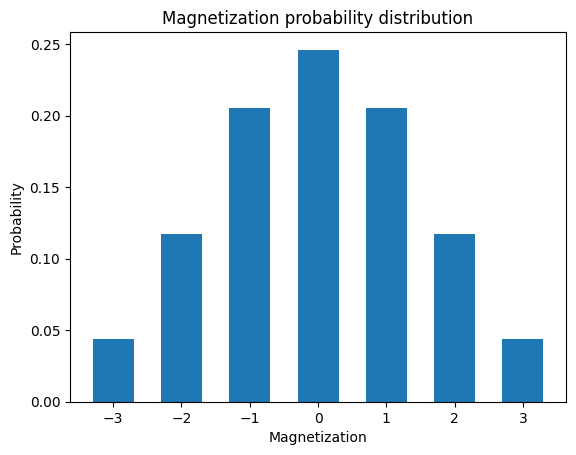

In [5]:
def magnetization_pdf(magnetization, length):
    '''
    Description:
    This function gets magnatization and a length and return the probability for an array in the given length to have the magnetization specified.

    Inputs:
    magnetization: the magnetization of the array
    length: The length of the array

    Outputs: 
    probability - the probability for an array on size "length" to have the magnetization specified 

    Example:
    inputs: magnetization = 1
            length = 10
    output: probability = 0.205078125
    '''
    all_configuations = generate_all_configurations(length)
    magnetizations = []
    for config in all_configuations:
        m = calculate_total_magnetization(config)
        magnetizations.append(m)
    total_magnetizations = len(magnetizations)
    magnetization_values, counts = np.unique_counts(magnetizations)
    magnetization_values = magnetization_values.tolist()
    if magnetization in magnetization_values:
        index = magnetization_values.index(magnetization)
    else:
        return 0
    probability = counts[index]/total_magnetizations
    return probability

length = 10
magnetization = 1
probability = magnetization_pdf(magnetization, length)
print(probability)

### plot the probability distribution of an array of a specified length###
m_range = np.arange(-3,3.5, step=0.5)
magnetizations_prob = [magnetization_pdf(m, length) for m in m_range]
plt.bar(m_range, magnetizations_prob ,width=0.6)
plt.title('Magnetization probability distribution')
plt.xlabel('Magnetization')
plt.ylabel('Probability')
plt.show()

## Part 2 - Entropy change in system equilibration

Now that we got the magnetization pdf we can calculate the Entropy of a configuaration. If we do for each step in time we can see how the Entropy changes. 

### Task 2.1 - generate a spin up 1D array of length $l$

Same as HW1

In [6]:
def generate_spin_up_array(length):
    '''
    Description:
    This function generates an array of only spin up. This will be used later to create our initial configuration for the time evolution of the system.

    Inputs:
    length - the length of the generated array
    
    Outputs: 
    spins_array - spin up array

    Example:
    input: length = 6
    output: spins_array = [0.5,0.5,0.5,0.5,0.5,0.5]
    '''
    spins_array = np.array([0.5]*length)
    return spins_array

print(generate_spin_up_array(5))

[0.5 0.5 0.5 0.5 0.5]


### Task 2.2 - generate $N$ 1d spin up arrays of size $l$ and store them in a Matrix

Hint: use the function created in task 2.1 and the function from HW 1.

In [7]:
def generate_N_1d_spin_up_arrays(N, length):
    '''
    Description:
    This function gets 2 number which corresponds to length of the array we want to generate and the number of arrays.
    Then the function generates N spin up arrays of a certain length and stores them in a matrix.

    Inputs:
    N - number of arrays to generate
    length - the length of the array 
    
    Outputs: 
    matrix - a matrix that contains all the arrays. Each row is a different array. 
    ***For convenience return the matrix as a numpy array****

    Example:
    input: length = 5
           N = 3 
    output: matrix = [[0.5 0.5 0.5 0.5 0.5]
                      [0.5 0.5 0.5 0.5 0.5]
                      [0.5 0.5 0.5 0.5 0.5]]
    '''
    matrix = []
    for _ in range(N):
        spins_array = generate_spin_up_array(length)
        matrix.append(spins_array)
    return np.array(matrix)

length = 6
N = 3
matrix = generate_N_1d_spin_up_arrays(N, length)
print(matrix)

[[0.5 0.5 0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5 0.5 0.5]]


### Task 2.3 - Flip a random spin in the array

This is the time evolution for a given array.

Same as HW1

In [8]:
def flip_spin_randomly(array):
    '''
    Description:
    This function flips 1 spin of a given array. This will be used as our simulation step (time evolution).

    Inputs:
    array - 1D spins array
    
    Outputs: 
    array_copy - a copy of the spins array but with 1 randomly fliped spin

    Example:
    input: array = [-0.5,0.5,-0.5,-0.5,-0.5,0.5]
    output: array_copy = [-0.5,0.5,-0.5,-0.5,0.5,0.5]
    '''
    array_copy = np.copy(array)
    index = np.random.choice(range(len(array_copy)), 1)[0]
    array_copy[index] = -1*array_copy[index]
    return(array_copy)

spins_array = generate_spin_up_array(5)
flipped_array = flip_spin_randomly(spins_array)
print(spins_array , flipped_array)

[0.5 0.5 0.5 0.5 0.5] [ 0.5 -0.5  0.5  0.5  0.5]


### Task 2.4 - calculate the average magnetization of $N$ 1D spin arrays

Same as HW1

In [9]:
def calculate_average_magnetization(spins_matrix):
    '''
    Description:
    This function gets a spins matrix (N arrays of length l) and calculates the average magnetization. (average magnetization per array).

    Inputs:
    spins_array = 2D array of spins like the one generated in task 1.2
    
    Outputs: 
    average magnetization - the average magnetization per array

    Example:
    input: spins_matrix = [[ 0.5  0.5 -0.5 -0.5  0.5  0.5]
                           [-0.5 -0.5 -0.5 -0.5  0.5  0.5]
                           [-0.5 -0.5 -0.5  0.5 -0.5 -0.5]]
    output: average_magnetization = -0.333
    '''
    magnetizations = np.sum(spins_matrix, axis=1)
    average_magnetization = np.mean(magnetizations)
    return average_magnetization

length = 6
N = 100
spins_matrix = generate_N_1d_spin_up_arrays(N, length)
average_magnetization = calculate_average_magnetization(spins_matrix)
print(average_magnetization)

3.0


### Task 2.5 - Flip a random spin for each array in a spin matrix

This is the time evolution for an ensemble.

In [10]:
def flip_spin_randomly_ensemble(spins_matrix):
    '''
    Description:
    This function flips 1 spin for each array in a given matrix (ensemble). This will be used as our simulation step.

    Inputs:
    spins_matrix - 1D spins array
    
    Outputs: 
    flipped_matrix - a copy of the spins matrix but with 1 randomly fliped spin in each row

    Example:
    input: spins_matrix = [[0.5 0.5]
                           [0.5 0.5]]
    output: flipped_matrix = [[-0.5  0.5]
                              [ 0.5 -0.5]]
    '''
    flipped_matrix = []
    spins_matrix_copy = np.copy(spins_matrix)
    for array in spins_matrix_copy:
        index = np.random.choice(range(len(array)), 1)[0]
        array[index] = -1*array[index]
        flipped_matrix.append(array)
    return(np.array(flipped_matrix))

N = 2
length = 2
spins_matrix = generate_N_1d_spin_up_arrays(N, length)
flipped_matrix = flip_spin_randomly_ensemble(spins_matrix)
print(spins_matrix ,'\n' , flipped_matrix)

[[0.5 0.5]
 [0.5 0.5]] 
 [[-0.5  0.5]
 [-0.5  0.5]]


### Task 2.6 - Calculate the entropy of a given microstate based on its magnetization

In [11]:
def calculate_microstate_entropy(magnetization, length):
    '''
    Description:
    This function calculates the entropy of a given microstates, the microstate parameters given are the magnetization and length.
    Hint - Use the Shanon Entropy formula

    Inputs:
    magnetization - magnetization of the spins array
    length - length of the spins array

    Outputs: 
    entropy - the entropy of the system

    Example:
    input: magnetization = 3
           length = 3
    output: entropy = 0.13732072188702246
    '''
    probability = magnetization_pdf(magnetization, length)
    if probability == 0:
        return 0
    entropy = -probability*np.log(probability)
    return entropy

length = 10
magnetization = 3
entropy = calculate_microstate_entropy(magnetization, length) 
print(entropy)

0.13732072188702246


### Task 2.7 - Calculate the entropy for an ensemble of arrays

In [12]:
def calculate_ensemble_entropy(ensemble):
    '''
    Description:
    This function calculates the entropy of a given ensemble.
    Hint - Use the formula from Task 2.6

    Inputs:
    ensemble - spins array matrix

    Outputs: 
    entropy - the entropy of the system

    Example:
    input: ensemble = [[0.5 0.5]
                       [0.5 0.5]]
    output: entropy = 0.6931471805599453
    '''
    total_entropy = 0
    for array in ensemble:
        magnetization = calculate_total_magnetization(array)
        length = len(array)
        entropy = calculate_microstate_entropy(magnetization, length)
        total_entropy += entropy
    return total_entropy

length = 2
N = 2
spins_matrix = generate_N_1d_spin_up_arrays(N, length)
print(spins_matrix)
print(calculate_ensemble_entropy(spins_matrix))

[[0.5 0.5]
 [0.5 0.5]]
0.6931471805599453


### Task 2.8 - Ensemble Time Evolution 

Here we will implement the ensemble time evolution. 

The system start at an initial configuration (here we will choose a spin up only array as our initial configuration), for each step of the simulation we will change the system using the function defined in Task 2.3

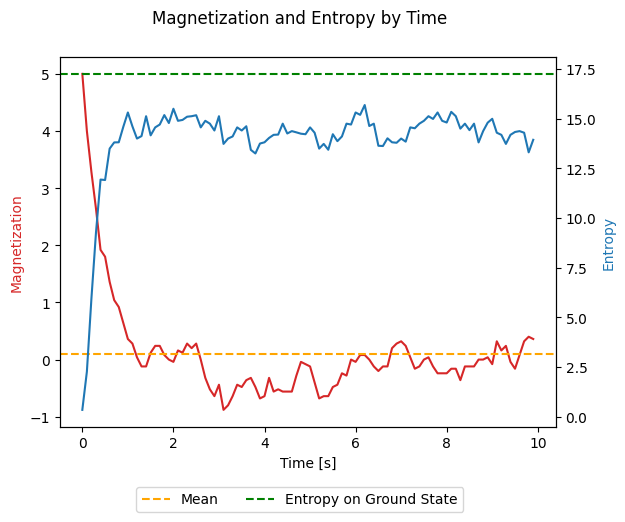

In [13]:
# Set simulation parameters (Time ,unit step and array length i.e time = 100 sec, dt = 1 sec, length = 10, N=100 ...)
simulation_time = 10
dt = 0.1
length = 10
N = 50

# Calculate the amount of steps
steps = int(simulation_time/dt)

#Create an array of all the timesteps of the simulation
time_array = np.arange(steps)

#Generate the initial ensemble (N 1d spin up arrays)
spins_matrix = generate_N_1d_spin_up_arrays(N, length)

#Advance the system in time and for each new configuration calculate and save the magnetization and entropy.
magnetization_per_time = []
entropy_per_time = []
for t in time_array:
    magnetization_per_time.append(calculate_average_magnetization(spins_matrix))
    entropy = calculate_ensemble_entropy(spins_matrix)
    entropy_per_time.append(entropy)
    spins_matrix = flip_spin_randomly_ensemble(spins_matrix)

fig, ax1 = plt.subplots()

#Plot the magnetization over time and the average magnetization
color = 'tab:red'
ax1.plot(time_array*dt, magnetization_per_time, c=color)
ax1.axhline(np.mean(magnetization_per_time), c='Orange', linestyle='--', label='Mean')
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Magnetization", c=color)

#Plot the entropy over time and the entropy of the ground state (assume even number of spins)
color = 'tab:blue'
ax2 = ax1.twinx()
ax2.axhline(N*calculate_microstate_entropy(0, length), c='Green', linestyle='--', label='Entropy on Ground State')
ax2.plot(time_array*dt, entropy_per_time,c=color)
ax2.set_ylabel("Entropy",c=color)

fig.suptitle("Magnetization and Entropy by Time")
fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.001), ncol=2) 
plt.show()